In [2]:
import kagglehub
import os
import pandas as pd
import uuid
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# Loading the dataset

In [3]:
path = kagglehub.dataset_download("khusheekapoor/coursera-courses-dataset-2021")
print("Path to dataset files:", path)

100%|██████████| 1.65M/1.65M [00:00<00:00, 3.26MB/s]

Extracting files...
Path to dataset files: C:\Users\jehad\.cache\kagglehub\datasets\khusheekapoor\coursera-courses-dataset-2021\versions\1


## Creating a Pandas DataFrame

In [4]:
os.listdir(path)

coursers = os.listdir(path)
for course in coursers:
    df= pd.read_csv(os.path.join(path,course))
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


# Basic Exploration and Data Cleaning

## Basic Exploration

### Info of the dataset using <code> info() </code>

In [5]:
print(f' number of examples: {len(df)}')
df.info()

 number of examples: 3522
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


### Description of the dataset and its statistics using <code> describe() </code>

In [6]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


### Printing the number of missing values

In [7]:
nullData = df.isnull().sum()
nullData
print(nullData)

print(f"\n **************************************\n\n Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]


Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

 **************************************

 Number of empty records = 0


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills


## Clean the Data

### replacing "invalid" data

In [ ]:
# df['Course Rating'].replace("Not Calibrated", 0, inplace=True)
# df['Course Rating'] = df['Course Rating'].astype(float)

# Convert non-numeric ratings to NaN
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

# Check how many NaN values exist
print(f" Number of NaN values in the  Course Rating  column: {df['Course Rating'].isna().sum()}")

# Decide how to handle NaNs (choose one approach)
df['Course Rating'].fillna(df['Course Rating'].median(), inplace=True)  # Replace with median
# df.dropna(subset=['Course Rating'], inplace=True)  # Remove rows with missing ratings

# Now safely convert to float
df['Course Rating'] = df['Course Rating'].astype(float)


 Number of NaN values in the  Course Rating  column: 82


C:\Users\jehad\AppData\Local\Temp\ipykernel_19368\7291350.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Course Rating'].fillna(df['Course Rating'].median(), inplace=True)  # Replace with median


In [ ]:
# Convert non-numeric ratings to NaN
print("courses by difficulty level")
# print(df['Difficulty Level'].value_counts())
# print(df['Course Rating'].value_counts())



df.info()
# print(df['Difficulty Level'].value_counts())

# # Check how many NaN values exist
# print(f" Number of NaN values in the  Course Rating  column: {df['Course Rating'].isna().sum()}")

# # Decide how to handle NaNs (choose one approach)
# df['Course Rating'].fillna(df['Course Rating'].median(), inplace=True)  # Replace with median
# # df.dropna(subset=['Course Rating'], inplace=True)  # Remove rows with missing ratings

# # Now safely convert to float
# df['Course Rating'] = df['Course Rating'].astype(float)

courses by difficulty level
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3522 non-null   object 
 1   University          3522 non-null   object 
 2   Difficulty Level    3522 non-null   object 
 3   Course Rating       3522 non-null   float64
 4   Course URL          3522 non-null   object 
 5   Course Description  3522 non-null   object 
 6   Skills              3522 non-null   object 
dtypes: float64(1), object(6)
memory usage: 192.7+ KB


### Type transformation

In [ ]:
df['Course Rating'] = df['Course Rating'].astype(str).astype(float)
df['Course Description'] = df['Course Description'].astype(str).astype(str)
df['Course URL'] = df['Course URL'].astype(str)
df['University'] = df['University'].astype(str)
df['Skills'] = df['Skills'].astype(str)
df['Course Name'] = df['Course Name'].astype(str)
df['Difficulty Level'] = df['Difficulty Level'].astype(str)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3522 non-null   object 
 1   University          3522 non-null   object 
 2   Difficulty Level    3522 non-null   object 
 3   Course Rating       3522 non-null   float64
 4   Course URL          3522 non-null   object 
 5   Course Description  3522 non-null   object 
 6   Skills              3522 non-null   object 
dtypes: float64(1), object(6)
memory usage: 192.7+ KB


### duplicate rows

In [ ]:
duplicates = df[df.duplicated()]
# print(duplicates)
duplicates

# duplicates = df[df.duplicated(subset=['Course Name'], keep=False)]
# # print(duplicates)
# duplicates

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
44,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...
158,Guided Imagery,University of Minnesota,Intermediate,4.8,https://www.coursera.org/learn/guided-imagery,"In this course, you will learn how you can use...",functional medicine music meditation counse...
160,Teach English Now! Capstone Project 1,Arizona State University,Advanced,4.8,https://www.coursera.org/learn/teaching-englis...,"In the final Capstone Project, you will apply ...",curiosity language english language lesson ...
163,Building Resilient Streaming Analytics Systems...,Google Cloud,Advanced,4.6,https://www.coursera.org/learn/streaming-analy...,*Note: this is a new course with updated conte...,Cloud Computing bigquery bigtable dataflow ...
213,Introduction to Ableton Live,Berklee College of Music,Advanced,4.8,https://www.coursera.org/learn/ableton-live,The new version of Introduction to Ableton Liv...,music Troubleshooting Video Editing saving ...
...,...,...,...,...,...,...,...
3470,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
3491,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-sc...,This capstone project course will give you a t...,Algorithms data clustering algorithms web a...
3499,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
3500,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...


In [ ]:
df.drop_duplicates(inplace=True)
df.describe()

,Course Rating
count,3424.000000
mean,4.553388
std,0.336607
min,1.000000
25%,4.500000
50%,4.600000
75%,4.700000
max,5.000000


### Text preprocessing

In [ ]:
group_of_columns= ['Course Name','University', 'Difficulty Level','Course URL','Course Description','Skills']


# # for column in df.columns:
for column in group_of_columns:
    # df[column] = df[column].str.strip()
    df[column + "_edited"] = df[column].str.encode('ascii', 'ignore').str.decode('ascii')
    df[column + "_edited"] = df[column + "_edited"].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))


df['Skills'] = df['Skills'].str.split()
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Course Name_edited,University_edited,Difficulty Level_edited,Course URL_edited,Course Description_edited,Skills_edited
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,"[Drama, Comedy, peering, screenwriting, film, ...",Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,https://www.coursera.org/learn/write-a-feature...,Write Full Length Feature Film Script In cours...,Drama Comedy peering screenwriting film Docume...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...","[Finance, business, plan, persona, (user, expe...",Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,https://www.coursera.org/learn/canvas-analysis...,"By end guided project, fluent identifying crea...",Finance business plan persona (user experience...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,"[chemistry, physics, Solar, Energy, film, lamb...",Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists general presentation sola...,chemistry physics Solar Energy film lambda cal...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...","[accounts, receivable, dupont, analysis, analy...",Finance Managers,IESE Business School,Intermediate,https://www.coursera.org/learn/operational-fin...,"When comes numbers, meets eye. In operational ...",accounts receivable dupont analysis analysis A...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,"[Data, Analysis, select, (sql), database, mana...",Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,https://www.coursera.org/learn/single-table-sq...,In course youll learn effectively retrieve dat...,Data Analysis select (sql) database management...


# adding an id to the courses

In [ ]:
df['ID'] = range(1, len(df) + 1)

df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Course Name_edited,University_edited,Difficulty Level_edited,Course URL_edited,Course Description_edited,Skills_edited,ID
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,"[Drama, Comedy, peering, screenwriting, film, ...",Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,https://www.coursera.org/learn/write-a-feature...,Write Full Length Feature Film Script In cours...,Drama Comedy peering screenwriting film Docume...,1
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...","[Finance, business, plan, persona, (user, expe...",Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,https://www.coursera.org/learn/canvas-analysis...,"By end guided project, fluent identifying crea...",Finance business plan persona (user experience...,2
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,"[chemistry, physics, Solar, Energy, film, lamb...",Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists general presentation sola...,chemistry physics Solar Energy film lambda cal...,3
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...","[accounts, receivable, dupont, analysis, analy...",Finance Managers,IESE Business School,Intermediate,https://www.coursera.org/learn/operational-fin...,"When comes numbers, meets eye. In operational ...",accounts receivable dupont analysis analysis A...,4
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,"[Data, Analysis, select, (sql), database, mana...",Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,https://www.coursera.org/learn/single-table-sq...,In course youll learn effectively retrieve dat...,Data Analysis select (sql) database management...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...","[Databases, syntax, analysis, web, Data, Visua...","Capstone: Retrieving, Processing, Visualizing ...",University Michigan,Beginner,https://www.coursera.org/learn/python-data-vis...,"In capstone, students build series application...",Databases syntax analysis web Data Visualizati...,3420
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...","[retirement, Causality, career, history, of, t...",Patrick Henry: Forgotten Founder,University Virginia,Intermediate,https://www.coursera.org/learn/henry,"Give liberty, death: Remembering Patrick Henry...",retirement Causality career history book blame...,3421
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,"[analytics, tableau, software, Business, Intel...",Business intelligence data analytics: Generate...,Macquarie University,Advanced,https://www.coursera.org/learn/business-intell...,Megatrends heavily influence todays organisati...,analytics tableau software Business Intelligen...,3422
3520,Rigid Body Dynamics,Korea Advanced Institute of Science

In [ ]:
df['Course Name'].value_counts()

,count
Course Name,
Corporate Strategy,2
Introduction to Psychology,2
Cryptography,2
Portfolio and Risk Management,2
Python Data Structures,2
...,...
Symmetric Cryptography,1
Using Descriptive Statistics to Analyze Data in R,1
BIM Fundamentals for Engineers,1


In [ ]:
# prompt: download the data as csv to my local device

# Assuming 'df' is your DataFrame from the previous code

# Create a unique filename to avoid overwriting
filename = f"coursera_courses_{uuid.uuid4()}.csv"

# Save the DataFrame to a CSV file
df.to_csv(filename, index=False)  # index=False prevents writing row indices to the file

# Download the file using the files module from google.colab
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Univariate Exploration

### course description

In [ ]:
description_len_distribution = df['Course Description'].str.len()

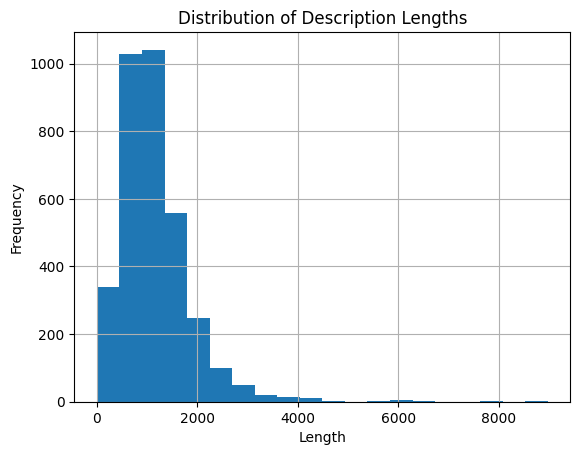

In [ ]:
import matplotlib.pyplot as plt
description_len_distribution.hist(bins=20)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
custom_stop_word = list(ENGLISH_STOP_WORDS.union(['course', "using",'-', 'In', "learn", "This", "In", "The", "We", "able", "end", "You", "use"]))

In [ ]:
from collections import Counter
words = ' '.join(df['Course Description_edited'].dropna()).split()
word_counts = Counter(words)
for word, count in word_counts.most_common(40):
    if word not in custom_stop_word:
        print(f"{word}: {count}")

data: 2080
course,: 1968
learning: 1080
business: 947
learners: 932
experience: 890
create: 875
basic: 852
help: 852
skills: 839
project: 838
understanding: 835
new: 818
different: 801
knowledge: 800
based: 767
design: 765
concepts: 709
best: 704
students: 700
understand: 690
used: 687
By: 668
make: 657
including: 649
working: 643
work: 636
need: 622


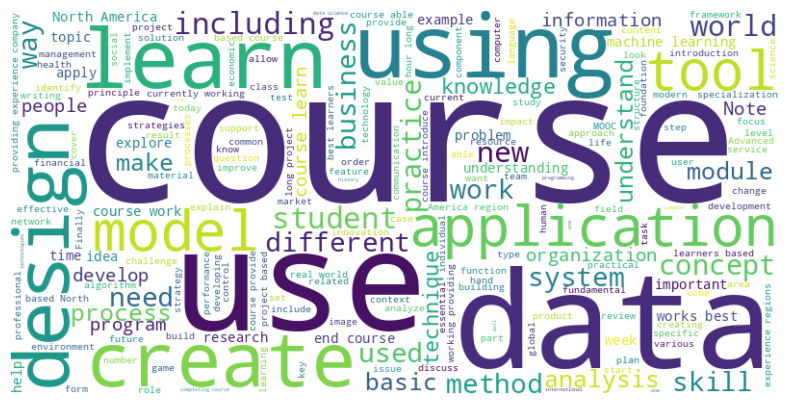

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Course Description_edited'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Skills

In [ ]:
skills_len_distribution = df['Skills'].str.len()

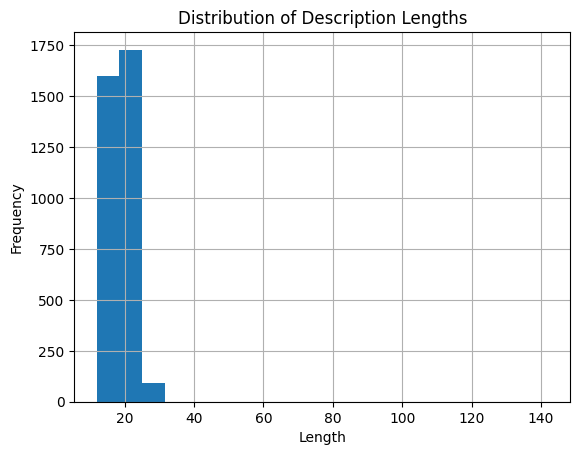

In [ ]:
import matplotlib.pyplot as plt
skills_len_distribution.hist(bins=20)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from collections import Counter
words = ' '.join(df['Skills_edited'].dropna()).split()
word_counts = Counter(words)
for word, count in word_counts.most_common(50):
    if word not in custom_stop_word:
        print(f"{word}: {count}")

business: 956
Management: 760
Programming: 621
project: 603
computer-science: 582
Learning: 576
analysis: 564
data-science: 501
Data: 455
management: 447
Leadership: 429
language: 405
Computer: 399
Analysis: 394
life-sciences: 376
Engineering: 327
Machine: 305
Strategy: 302
physical-science-and-engineering: 300
modeling: 286
web: 284
social-sciences: 279
health: 276
software-development: 274
Development: 273
process: 272
marketing: 269
security: 266
Python: 259
Writing: 254
Design: 247
Cloud: 246
Planning: 245
market: 244
software: 242
education: 242
design: 239
data-analysis: 239
history: 238
machine-learning: 229
function: 223
arts-and-humanities: 219
data: 216
Communication: 213
law: 208
Human: 195
Marketing: 192
leadership-and-management: 180
information-technology: 174
finance: 173


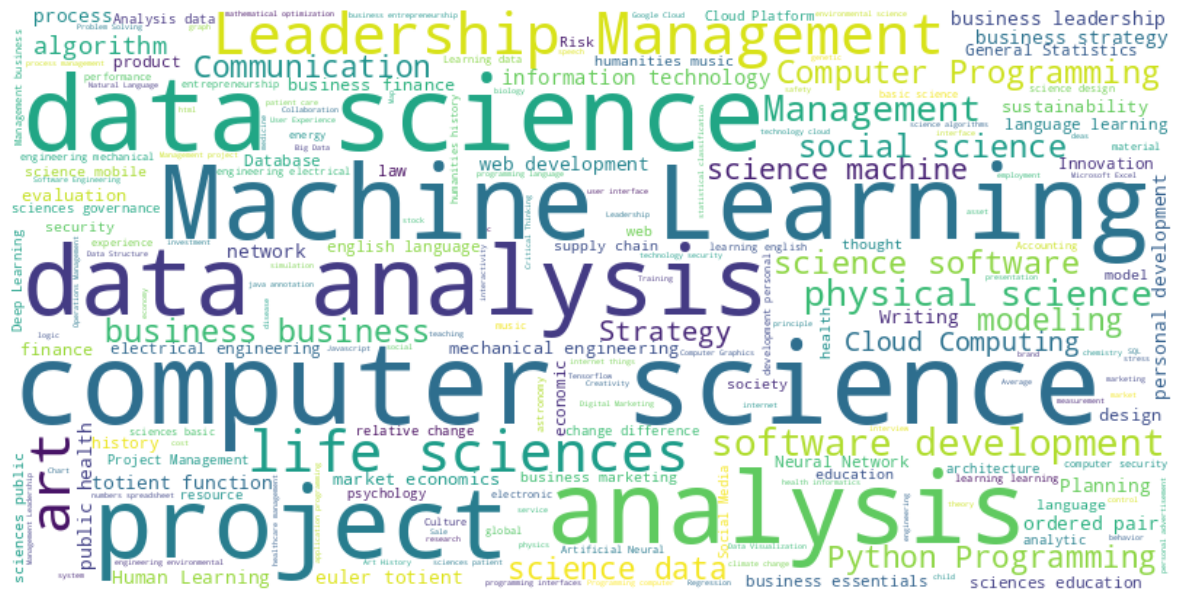

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Skills_edited'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df['Skills_edited']


,Skills_edited
0,Drama Comedy peering screenwriting film Docume...
1,Finance business plan persona (user experience...
2,chemistry physics Solar Energy film lambda cal...
3,accounts receivable dupont analysis analysis A...
4,Data Analysis select (sql) database management...
...,...
3517,Databases syntax analysis web Data Visualizati...
3518,retirement Causality career history book blame...
3519,analytics tableau software Business Intelligen...
3520,Angular Mechanical Design fluid mechanics Fram...


# Bivariate Exploration

In [ ]:
## Description len vs Skills len

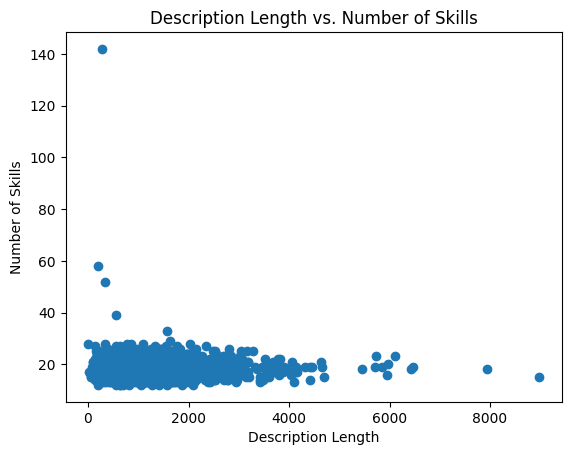

In [ ]:
plt.scatter(description_len_distribution, skills_len_distribution)
plt.title('Description Length vs. Number of Skills')
plt.xlabel('Description Length')
plt.ylabel('Number of Skills')
plt.show()